In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [6]:
data = pd.read_csv('/content/drug200.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
#Convert categorical columns using one-hot encoding or label encoding
data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})  # Convert Sex to binary
data['BP'] = data['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})  # Convert BP to numeric values
data['Cholesterol'] = data['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})  # Convert Cholesterol

# Separate features and target variable
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Features
y = data['Drug']  # Target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)  # You can change the depth based on experimentation

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [12]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [20]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



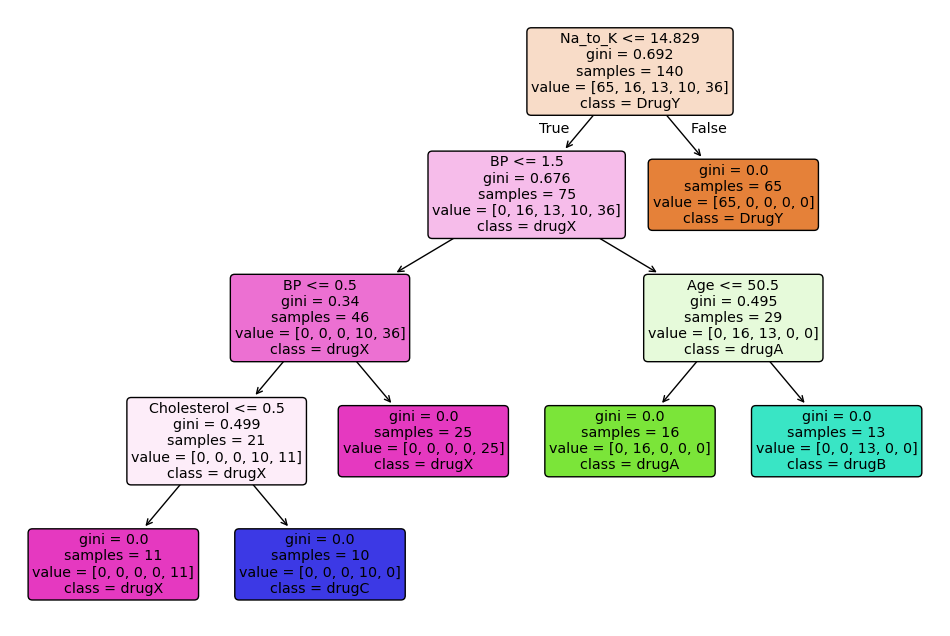

In [21]:
#visualize the data
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()